***
# 深層学習day1
***

+ 識別モデル：データがどのクラスに入る確率が高いかを計算（高次元→低次元） 

  入力データxに対し，$$P(C_k \mid x)$$を計算する
  - 決定木，ロジスティック回帰，サポートベクターマシン，ニューラルネットワーク
+ 生成モデル：クラスに属するものがデータになるかを確率で計算（低次元→高次元）（VAE, GAN）  

  条件付き確率・尤度→ベイズ
  $$
  P(C_k \mid x) = \frac{P(x \mid C_k)P(C_k)}{\sum P(x \mid C_k)p(C_k)}
  $$
の分子部分で確率を計算．生成の分布形状までを推定．
  - 隠れマルコフモデル，ベイジアンネットワーク，変分オートエンコーダ，敵対的生成ネットワーク  

+ 識別関数：ルール（関数）でデータを分類  
  - 確率で出力されない．学習量は小さい

+ 万能近似定理：2層ニューラルネットワークはどんな関数も任意の精度で近似できる．

### ニューラルネットワーク全体像
+ ディープラーニングは何をしようとしているのか？  
⇒　分類のために，明示的なプログラムを作成するのではなく，多層ニューラルネットワークを用いた数学モデルを構築
+ 学習によりネットワークの重みとバイアスを最適化する
+ 数式の記号
  + 訓練データのインデックス$$n = [1 \dots N]$$
  + 入力側ノードのインデックス$$i= [1 \dots I]$$　※層によってIの値が変わる
  + 出力側ノードのインデックス$$k=[1 \dots K]$$　※層によってKの値が変わる
  + 入力$$ \boldsymbol{x}_n = [x_{n1}, \cdots , x_{ni}, \cdots , x_{nI}]$$
  + 正解ラベル$$\boldsymbol{d}_n = [d_{n1}, \cdots , d_{nk}, \cdots , d_{nK}]$$
  + 層のインデックス$$l = [1 \dots L]$$
  + 中間層ノードのインデックス：$$j = [1 \dots J]$$  　※層によってJの値が変わる
  + l層の出力$$\boldsymbol{z}^{(l)} = [z_1^{(l)}, \cdots, z_k^{(l)}, \cdots,z_K^{(l)}]$$
  +  l層の重み$$\boldsymbol{W}^{(l)}$$　行列のサイズは(出力側のノード数×入力側のノード数)
  +  l層のバイアス$$\boldsymbol{b}^{(l)}$$　ベクトルの要素数は出力側のノード数
  + l層への入力$$\boldsymbol{u}^{(l)} = \boldsymbol{W}^{(l)} \boldsymbol{z}^{(l-1)} + \boldsymbol{b}^{(l)}$$
  + l層の活性化関数$$\boldsymbol{f}^{(l)}(\boldsymbol{u}^{(l)})=[f^{(l)}(u^{(l)}_1), \cdots, f^{(l)}(u^{(l)}_J)]$$　活性化関数による演算結果が次の層への出力
  + 出力層$$\boldsymbol{y}_n = \boldsymbol{z}^{(L)}$$
  zベクトルは訓練データインデックスが省略されている．
  + 誤差関数$$E(\boldsymbol{w}) = \sum_{n} E_n(\boldsymbol{w})$$ より$$\nabla E(\boldsymbol{w}) = \sum_n \frac{\partial E_n(\boldsymbol{w})}{\partial \boldsymbol{w}}$$

### 【確認テスト】
ディープラーニングは、結局何をやろうとしているか2行以内で述べよ。  
【解答】  予測するための各特徴量の値を自動的に計算させる機械学習から一歩進んで，予測に利用する特徴量自体を学習により抽出する．

また、次の中のどの値の最適化が最終目的か。全て選べ。①入力値[ X] ②出力値[ Y]③重み[W]④バイアス[b]⑤総入力[u] ⑥中間層入力[ z]⑦学習率[ρ]  
【解答】③重み[W]④バイアス[b]

### 【確認テスト】
次のネットワークを紙にかけ。
+ 入力層︓2ノード1層
+ 中間層︓３ノード2層
+ 出力層︓1ノード1層


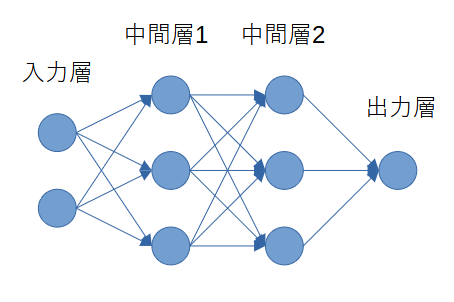

In [ ]:
display(img)

【参考文献】
1. C.M.ビショップ著[元田浩ら監訳]『パターン認識と機械学習 上』丸善　2012.01
2. 鈴木大慈『カーネル法と深層学習の数理』広島市立大学集中講義　2020.08  
 http://ibis.t.u-tokyo.ac.jp/suzuki/lecture/2020/intensive/Hiroshima_2020_Deep.pdf
3.  岡谷貴之著『深層学習』講談社　2015.04

## Section1: 入力層～中間層
+ 入力ベクトルと重みベクトルとの内積にバイアスベクトルを加えて中間層へ
+ 幾何学的に考えると重みベクトルは傾きの変化，バイアスベクトルは切片の変化に対応
+ 教師データを元に重みベクトルとバイアスベクトルを学習させる



In [ ]:
import numpy as np

# ReLU関数
def relu(x):
    return np.maximum(0, x)

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

In [ ]:
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])
print_vec("重み", W)

# バイアス
b = 0.5
print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)

# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = relu(u)
print_vec("中間層出力", z)

*** 重み ***
[[0.1]
 [0.2]]

*** バイアス ***
0.5

*** 入力 ***
[2 3]

*** 総入力 ***
[1.3]

*** 中間層出力 ***
[1.3]



ソースコード分析
$$
\boldsymbol{W} = \left( \begin{array}{c} 0.1\\ 0.2 \end{array}\right), b = 0.5, \boldsymbol{x}= (2, 3)
$$ より，
$$
u = \boldsymbol{x} \cdot \boldsymbol{W} + b =
 \left( \begin{array}{c} 0.1\\ 0.2 \end{array}\right) (2,3) + 0.5
 = 0.2 + 0.6 + 0.5 = 1.3
$$
また，
$$
relu(x)= 
\begin{cases} 0 & (x<0) \\ x & (x \ge 0) \end{cases} 
$$
から，$$z = relu(1.3) = 1.3$$

In [ ]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("中間層出力2", z2)
    print_vec("出力1", u3)
    print("出力合計: " + str(np.sum(y)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

*** バイアス3 ***
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 中間層出力2 ***
[1.02 2.29]

*** 出力1 ***
[1.56  3.222]

出力合計: 4.782


ソースコード分析
$$
\boldsymbol{W}^{(1)} = \left ( \begin{array}{ccc} 0.1 \ 0.3 \ 0.5 \\ 0.2\ 0.4\ 0.6 \end{array} \right),
\boldsymbol{W}^{(2)} = \left ( \begin{array}{cc} 0.1\ 0.4 \\ 0.2\ 0.5 \\ 0.3\ 0.6 \end{array} \right),
\boldsymbol{W}^{(3)} = \left ( \begin{array}{cc} 0.1 \ 0.3 \\ 0.2 \ 0.4 \end{array} \right) \\
\boldsymbol{b}^{(1)} = (0.1\ 0.2\ 0.3),~~ \boldsymbol{b}^{(2)} = (0.1\ 0.2),~~\boldsymbol{b}^{(3)} = (1\ 2) \\
\boldsymbol{x}= (1\ 2)
$$より，
$$
\begin{array}{l}
\boldsymbol{u}^{(1)} = \boldsymbol{x} \cdot \boldsymbol{W}^{(1)} + \boldsymbol{b}^{(1)} = (1\ 2) \left ( \begin{array}{ccc} 0.1 \ 0.3 \ 0.5 \\ 0.2\ 0.4\ 0.6 \end{array} \right) + (0.1\ 0.2\ 0.3) = (0.6\ 1.3\ 2.0)\\
\boldsymbol{z}^{(1)} = relu(\boldsymbol{u}^{(1)} ) = (0.6\ 1.3\ 2.0)\\
\boldsymbol{u}^{(2)} = \boldsymbol{z}^{(1)} \cdot \boldsymbol{W}^{(2)} + \boldsymbol{b}^{(2)} = (0.6\ 1.3\ 2.0) \left ( \begin{array}{cc} 0.1\ 0.4 \\ 0.2\ 0.5 \\ 0.3\ 0.6 \end{array} \right) + (0.1\ 0.2) = (1.02\ 2.29)\\
\boldsymbol{z}^{(2)} = relu(\boldsymbol{u}^{(2)} ) = (1.02\ 2.29)\\
\boldsymbol{u}^{(3)} = \boldsymbol{z}^{(2)} \cdot \boldsymbol{W}^{(3)} + \boldsymbol{b}^{(3)} = (1.02\ 2.29)  \left ( \begin{array}{cc} 0.1 \ 0.3 \\ 0.2 \ 0.4 \end{array} \right) + (1\ 2) = (1.56\ 3.222)\\
\boldsymbol{y} = \boldsymbol{u}^{(3)} = (1.56\ 3.222)
\end{array}
$$

【参考文献】
1. C.M.ビショップ著[元田浩ら監訳]『パターン認識と機械学習 上』丸善　2012.01
2. 岡谷貴之著『深層学習』講談社　2015.04

### 【確認テスト】
$$
u = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + b = W \boldsymbol{x} + b
$$
この数式をPythonでかけ
```python
u = np.dot(x, W) + b
```

### 【確認テスト】
1-1のファイルから中間層の出力を定義しているソースを抜き出せ。

```python
z2 = functions.relu(u2)
```

## Section2: 活性化関数
+ 次の層への信号の強弱を変化
+ 非線形関数を利用することで表現力が増す  
  + 線形性：加法性と斉次性を満たすもの
  + 入力層～中間層の処理は線形処理
+ 中間層での活性化関数
  + ステップ関数：今はほとんど使われていない．微分不可（線形分離可能なもののみ学習可能）
  + シグモイド関数：出力範囲0～1を緩やかに変化．微分可能．ただし，勾配消失問題あり
  + ReLU関数：入力値が0より大きい場合はそのままの値を出力し，0以下で0を出力する．勾配消失問題に対応

### 【確認テスト】
線形と非線形の違いを図にかいて簡易に説明せよ。  
【解答】2次元のグラフで説明するのなら，線形のグラフは直線で表すことができ，非線形のグラフは曲線など直線以外で表される．

In [ ]:
# ReLU関数
def relu(x):
    return np.maximum(0, x)

ReLU関数：np.maximum関数で引数xと0のうち，大きい方を返す

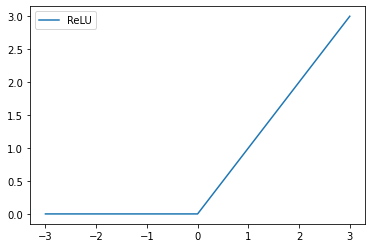

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 5)
plt.plot(x, relu(x), label="ReLU")
plt.legend()
plt.show()

### 【確認テスト】
$$ \boldsymbol{z} = f(\boldsymbol{u})$$
配布されたソースコードより該当する箇所を抜き出せ。  
```python
z1 = functions.relu(u1)

z2 = functions.relu(u2)
```

## Section3: 出力層
+ 最終的に必要な分類や値を出力

### 誤差関数
+ 訓練データの入力をニューラルネットワークを通して出力した結果が訓練データの正解とどのくらい間違っているのかを計算
+ 計算結果は値が小さいほどよい
+ 誤差関数
  + 2乗和誤差：$$E_n(\boldsymbol{w}) = \frac{1}{2} \sum_{j=1}^{J} (y_j -d_j)^2 = \frac{1}{2}||\boldsymbol{y} - \boldsymbol{d} ||^2$$
  + クロスエントロピー誤差：分類問題で使用
  + 平均二乗誤差：回帰問題で使用

### 【確認テスト】
・なぜ、引き算でなく二乗するか述べよ  
・下式の1/2はどういう意味を持つか述べよ  
【解答】  
・プラスの誤差とマイナスの誤差が相殺されるのを防ぐため  
・微分したときに係数が1になるように

In [ ]:
# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

mean_squared_error関数  
+ 引数に出力値dと正解yのベクトルを受け取る
+ numpy.square関数では引数のベクトルの要素をそれぞれ2乗したものを要素に持つベクトルを返す
+ numpy.mean関数では引数のベクトルの要素の平均値を返す

In [ ]:
# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size

### 【確認テスト】
クロスエントロピー誤差
$$
E = -\frac{1}{N}\sum_n\sum_{k} d_{nk} \log y_{nk}
$$

cross_entropy_error関数  
ソースコード分析  
+ 引数は正解データと予測結果
+ サンプル数が1の場合に1次元配列を2次元配列に変換
+ one-hotベクトルで値が0の要素はその後の演算に影響を与えないから，各サンプルのone-hotベクトルの要素1であるインデックに対応する予測結果の要素のみ抽出して演算する

出力層での活性化関数
  + 入力側の各信号を大きさの比率は保ったままに変換
  + 分類では出力値を0～1の範囲に収め総和が1になるようにする（確率化）
    + 回帰：恒等写像
    + 2値分類：シグモイド関数
$$f(x) = \frac{1}{1 + e^{-x}}$$
    + 多値分類：ソフトマックス関数$$f(i, u) = \frac{e^{u_i}}{\sum_{k=1}^{K} e^{u_k}}$$

In [ ]:
# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# ソフトマックス関数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

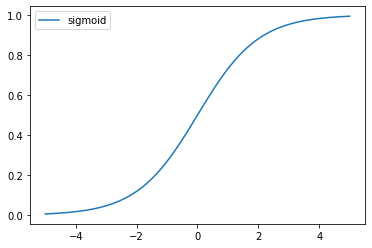

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label="sigmoid")
plt.legend()
plt.show()

### 【確認テスト】
ソースコード分析

softmax関数
+ オーバーフロー対策
$$
\begin{eqnarray}
y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)} 
&=& \frac{C \exp(a_k)}{C \sum_{i=1}^n \exp(a_i)} \\
&=& \frac{\exp(a_k + \log C)}{\sum_{i=1}^n \exp(a_i + \log C)} \\
&=& \frac{\exp(a_k + C')}{\sum_{i=1}^n \exp(a_i + C')}
\end{eqnarray}
$$

+ 引数が1次元配列の場合  
  配列の各要素をeの要素乗と指数化し比率を計算する
+ 引数が2次元配列の場合  
  2次元配列を転置して，縦ベクトルで演算処理をすることで縦ベクトルごとでソフトマックス関数を適用できる

【参考文献】
1. 斎藤康毅著『セロから作るDeepLearning』オライリー・ジャパン 2016.09

## Section4: 勾配降下法

勾配降下法
$$
w^{(t+1)} = w^{(t)} - \epsilon \nabla E
$$
+ ε：学習率  
  + 学習率が小さいと収束するのに時間がかかる．局所最適解に収束してしまう可能性がある
  + 学習率が大きいと発散する可能性がある

学習のステップ  
+ 仮の重みとバイアスを用いて学習
+ 正解データとの誤差関数を使って重みとバイアスを更新
+ 新しい重みとバイアスを用いて再学習
+ 設定した誤差範囲に入るまで繰り返す

確率的勾配降下法（SGD）
$$
w^{(t+1)} = w^{(t)} - \epsilon \nabla E_n
$$
+ 教師データの一部分のみランダムに使用
+ 計算コストの軽減
+ 局所最適解に収束するリスクが少ない
+ 教師データを後から追加できる（オンライン学習）

ミニバッチ勾配降下法
$$
w^{(t+1)} = w^{(t)} - \epsilon \nabla E_t \\
E_t = \frac{1}{N_t} \sum_{n \in D_t} E_n \\
N_t = |D_t|
$$
+ ランダムに分割した教師データで学習
+ 大量の教師データを分割して学習
+ CPUでのスレッド並列化・GPUでのSIMD並列化



### 【確認テスト】
$$w^{(t+1)} = w^{(t)} - \epsilon \nabla E$$
該当するソースコードを探してみよう。

```python
grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]
```


### 【確認テスト】
オンライン学習とは何か  
【解答】学習データを収集してから学習する（バッチ学習）のではなく，学習データを学習中に逐次追加することがでる学習法

### 【確認テスト】
$$w^{(t+1)} = w^{(t)} - \epsilon \nabla E_t $$
この数式の意味を図に書いて説明せよ。  
【解答】この式をミニバッチ勾配降下法の更新式であるとする．
ここでEtはt回目の更新時に使用するサンプル集合Dtの誤差であるから，この更新式では更新回数ごとにサンプル集合を変えて処理が行われる．


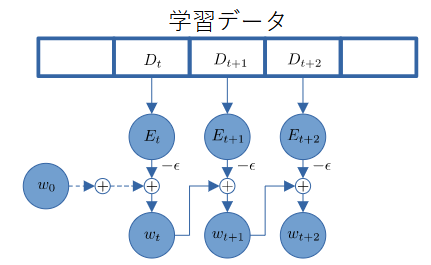

In [3]:
display(img)

誤差勾配の計算
$$
\nabla E = \frac{\partial E}{\partial \boldsymbol{w}}
= \left [ \frac{\partial E}{\partial w_1} \cdots \frac{\partial E}{\partial w_M} \right ]
$$

数値微分
$$
\frac{\partial E}{\partial w_m} \approx \frac{E(w_m + h) - E(w_m - h)}{2h}
$$
+ 微小数値による変化率の計算
+ 計算量が非常に大きくなる　⇒　誤差逆伝播法を使う


## Section5: 誤差逆伝播法
微分の連鎖律を利用して，出力側の微分計算値を入力側の演算に再利用する

誤差勾配の計算
誤差関数が二乗誤差の場合
$$E(\boldsymbol{y}) = \frac{1}{2} \sum_{j=1}^{J} (y_j - d_j)^2 = \frac{1}{2} || \boldsymbol{y} - \boldsymbol{d} ||^2　\\
\boldsymbol{y} = \boldsymbol{u}^{(L)}\\
\boldsymbol{u}^{(l)} = \boldsymbol{w}^{(l)}\boldsymbol{z}^{(l-1)} + \boldsymbol{b}^{(l)}
$$
より，
$$
\frac{\partial E}{\partial w^{(l)}_{ji}} = \frac{\partial E}{\partial \boldsymbol{y}} \frac{\partial \boldsymbol{y}}{\partial \boldsymbol{u}} \frac{\partial \boldsymbol{u}}{\partial w^{(l)}_{ji}}
$$
について，
$$
\frac{\partial E(\boldsymbol {y})}{\partial \boldsymbol{y}} = \frac{\partial}{\partial \boldsymbol{y}} \frac{1}{2} || \boldsymbol{y} - \boldsymbol{d} ||^2 = \boldsymbol{y} - \boldsymbol{d} \\
 \frac{\partial \boldsymbol{y}(\boldsymbol{u})}{\partial \boldsymbol{u}} = \frac{\partial \boldsymbol{u}}{\partial \boldsymbol{u}} = 1 \\
\frac{\partial \boldsymbol{u}^{(l)}}{\partial w_{ji}^{(l)}} = \frac{\partial}{\partial w_{ji}^{(l)}} \left( \boldsymbol{w}^{(l)}\boldsymbol{z}^{(l-1)} + \boldsymbol{b}^{(l)}\right) = \frac{\partial}{\partial w_{ji}^{(l)}} \boldsymbol{w}^{(l)}\boldsymbol{z}^{(l-1)} + \frac{\partial}{\partial w_{ji}^{(l)}} \boldsymbol{b}^{(l)} = \left[0 \cdots z_{i}^{(l-1)} \cdots 0 \right]^T
$$
以上より，
$$
\frac{\partial E}{\partial w^{(l)}_{ji}} = \frac{\partial E}{\partial \boldsymbol{y}} \frac{\partial \boldsymbol{y}}{\partial \boldsymbol{u}} \frac{\partial \boldsymbol{u}}{\partial w^{(l)}_{ji}} = \left( \boldsymbol{y} - \boldsymbol{d} \right) \cdot  \left[0 \cdots z_{i}^{(l-1)} \cdots 0 \right]^T = (y_j - d_j)z^{(l-1)}_i
$$

In [ ]:
# シグモイド関数（ロジスティック関数）の導関数
def d_sigmoid(x):
    dx = (1.0 - sigmoid(x)) * sigmoid(x)
    return dx

# ReLU関数の導関数
def d_relu(x):
    return np.where( x > 0, 1, 0)
    
# ステップ関数の導関数
def d_step_function(x):
    return 0

# 平均二乗誤差の導関数
def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx

##### 結果表示 #####


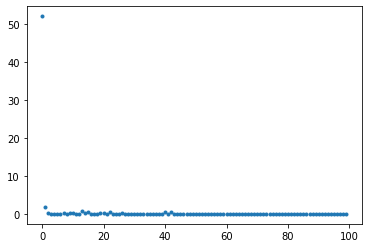

In [ ]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 100

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

In [ ]:
network

{'W1': array([[-1.18991198,  1.37223639, -0.38435042,  0.88174518,  1.33919416,
         -0.68072588, -1.95193911,  0.82151638, -0.16816872,  0.2370156 ],
        [ 1.06464138, -0.99657975, -0.62257612, -0.95576416,  1.05603526,
         -2.10801168, -1.81074427,  1.57801379,  0.80850159, -0.65236204]]),
 'W2': array([-0.45027597,  0.31843516,  0.07369253,  0.96908492,  0.03281138,
        -0.40496005, -1.03958582,  1.24239685, -0.43452255,  0.94444464]),
 'b1': array([-0.25694137,  0.30598756, -1.50457487, -0.65237265, -1.9882072 ,
        -1.85218932,  1.32584261, -0.16682303, -0.45818778, -0.5151163 ]),
 'b2': 1.4245391735265724}

ソースコード分析  
backward関数  
+ 変数　delta2：誤差関数のyについての変化率
$$
\frac{\partial E}{\partial \boldsymbol{y}} = \frac{\partial}{\partial \boldsymbol{y}} \frac{1}{2} || \boldsymbol{y} - \boldsymbol{d} ||^2 = \boldsymbol{y} - \boldsymbol{d}
$$
+ 変数 grad["b2"]：誤差関数のb2についての変化率
  微分の連鎖律を使うと
$$
\frac{\partial E}{\partial \boldsymbol{b}^{(2)}} = \frac{\partial E}{\partial \boldsymbol{y}} \frac{\partial \boldsymbol{y}}{\partial \boldsymbol{u}^{(2)}}\frac{\partial \boldsymbol{u}^{(2)}}{\partial \boldsymbol{b}^{(2)}}
$$
ここで，
$$
\frac{\partial \boldsymbol{y}}{\partial \boldsymbol{u}^{(2)}} = \frac{\partial \boldsymbol{u}^{(2)}}{\partial \boldsymbol{u}^{(2)}} = 1~~,~~\frac{\partial \boldsymbol{u}^{(2)}}{\partial \boldsymbol{b}^{(2)}}=\frac{\partial}{\partial \boldsymbol{b}^{(2)}}\left(\boldsymbol{z}^{(1)} \cdot W^{(2)} + \boldsymbol{b}^{(2)} \right) = \boldsymbol{1}
$$
よって，
$$
\frac{\partial E}{\partial \boldsymbol{b}^{(2)}} = (\boldsymbol{y} - \boldsymbol{d}) \cdot \boldsymbol{1} = \sum (y - d)
$$
+ 変数 grad["W2"]：誤差関数のW2についての変化率
$$
\frac{\partial E}{\partial W^{(2)}} = \frac{\partial E}{\partial \boldsymbol{y}} \frac{\partial \boldsymbol{y}}{\partial \boldsymbol{u}^{(2)}}\frac{\partial \boldsymbol{u}^{(2)}}{\partial W^{(2)}} =(\boldsymbol{y} - \boldsymbol{d}) \cdot \boldsymbol{z}^{(1)} 
$$
+ 変数 delta1：中間層の活性化関数をシグモイド関数とした場合，導関数は
$$
\frac{\partial \boldsymbol{z}^{(1)}}{\partial \boldsymbol{u}^{(1)}} = \frac{\partial}{\partial \boldsymbol{u}^{(1)}} \left(\frac{1}{1 + e^{-\boldsymbol{u}^{(1)}}} \right) =  \boldsymbol{z}^{(1)} \otimes (\boldsymbol{1}-  \boldsymbol{z}^{(1)})
$$ 
と表すことができるので，誤差関数のu1についての変化率は
$$
\frac{\partial E}{\partial \boldsymbol{u}^{(1)}} = \frac{\partial E}{\partial \boldsymbol{z}^{(1)}}  \frac{\partial \boldsymbol{z}^{(1)}}{\partial \boldsymbol{u}^{(1)}} = (\boldsymbol{y} - \boldsymbol{d}) \cdot W^{(2)} \otimes \left( \boldsymbol{z}^{(1)} \otimes (\boldsymbol{1}-  \boldsymbol{z}^{(1)}) \right)
$$
+ 変数 grad["b1"]：誤差関数のb1についての変化率
$$
\frac{\partial E}{\partial \boldsymbol{b}^{(1)}} = \frac{\partial E}{\partial \boldsymbol{z}^{(1)}}  \frac{\partial \boldsymbol{z}^{(1)}}{\partial \boldsymbol{u}^{(1)}}\frac{\partial \boldsymbol{u}^{(1)}}{\partial \boldsymbol{b}^{(1)}}
= \frac{\partial E}{\partial \boldsymbol{u}^{(1)}} \cdot \boldsymbol{1} = \sum (y_i - d_i)W^{(2)}_iz^{(1)}_i(1 - z^{(1)}_i)
$$
+ 変数 grad["W1"]：誤差関数のW1についての変化率
$$
\frac{\partial E}{\partial W^{(1)}} = \frac{\partial E}{\partial \boldsymbol{u}^{(1)}} \frac{\partial \boldsymbol{u}^{(1)}}{\partial W^{(1)}} = \boldsymbol{x} \cdot  \frac{\partial E}{\partial \boldsymbol{u}^{(1)}}
$$

更新処理
+ サンプルデータを順伝播で計算し予測値と中間出力を求める
+ 求めた予測値，中間出力用いて逆伝播演算をしてそれぞれの変化率を求める
+ 求めた各変化率と学習率を用いて各重みとバイアスを更新する

### 【確認テスト】
誤差逆伝播法では不要な再帰的処理を避ける事が出来る。既に行った計算結果を保持しているソースコードを抽出せよ。  
【解答】
```python
    delta2 = functions.d_mean_squared_error(d, y)
    grad['b2'] = np.sum(delta2, axis=0)
    grad['W2'] = np.dot(z1.T, delta2)
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)
    delta1 = delta1[np.newaxis, :]
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    grad['W1'] = np.dot(x.T, delta1)
  ```

### 【確認テスト】
2つの空欄に該当するソースコードを探せ
```python
delta2 = functions.d_mean_squared_error(d, y)

grad['W2'] = np.dot(z1.T, delta2)
```


【参考文献】
1. 岡谷貴之著『深層学習』講談社　2015.04
2. 斎藤康毅著『セロから作るDeepLearning』オライリー・ジャパン 2016.09